We will use sklearn module to implement decision tree algorithm . sklearn uses CART (Classification and Regression Trees) algorithm and by default it uses impurity as a criteria to split the nodes.

There are other algorithm ID3,C4.5,Chi-Square etc.

We Will see the use of cart in following implementation.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

#For datavisualiztion 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
# For model prepration
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler


The line %matplotlib inline is a special command used in Jupyter Notebooks or JupyterLab environments. It tells the notebook interface to display matplotlib plots directly within the notebook itself, rather than in a separate window or file.

In [2]:
#Import the Data

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Alcohol_content,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Low,5


In [ ]:
#See Data Summary

In [4]:
data.shape

(1599, 13)

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Alcohol_content         0
quality                 0
dtype: int64

In [ ]:
#There is no null values we are good to proceed

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As we hvae categorical column(Alcohol_content) we  need to convert into numeric data using encoding method.



Content is following same like low medium high . we need to give weight according to the order .

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
df=OrdinalEncoder(categories=[['Low','Medium','High']])
df1=df.fit_transform(data[['Alcohol_content']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [2.],
       [1.],
       [2.]])

Override alcohol content column with codes . Now we are infuse the original data. and convert data transformation we are reassigning the data in the same column.

In [9]:
data['Alcohol_content']=df1

Then we are going to check relationship and multicollinearity problem.

In Machine learning there is not fixed method , there is no standard.



If everything is stardized if everything is pre defined . every company they will atomat everything . if everything is fix company dont need data scientist.

Why Dont need - > Beacuse only human and see tha data and analyse it machine  working based on ours intruction

- Still we are not started to check relationship.

# Plotting Heatmap (Correaltion Matrix)

- Lets try to see . if we can reduce the features using different tehniques.

- Lets plot heatmap to visualize and find the coefficient of multicollinearity.

In [10]:
df_corr=data.corr().abs()# (ab But we need proof.solute value)This code will get the coefficient of one varible vs all other variable(Relationship)

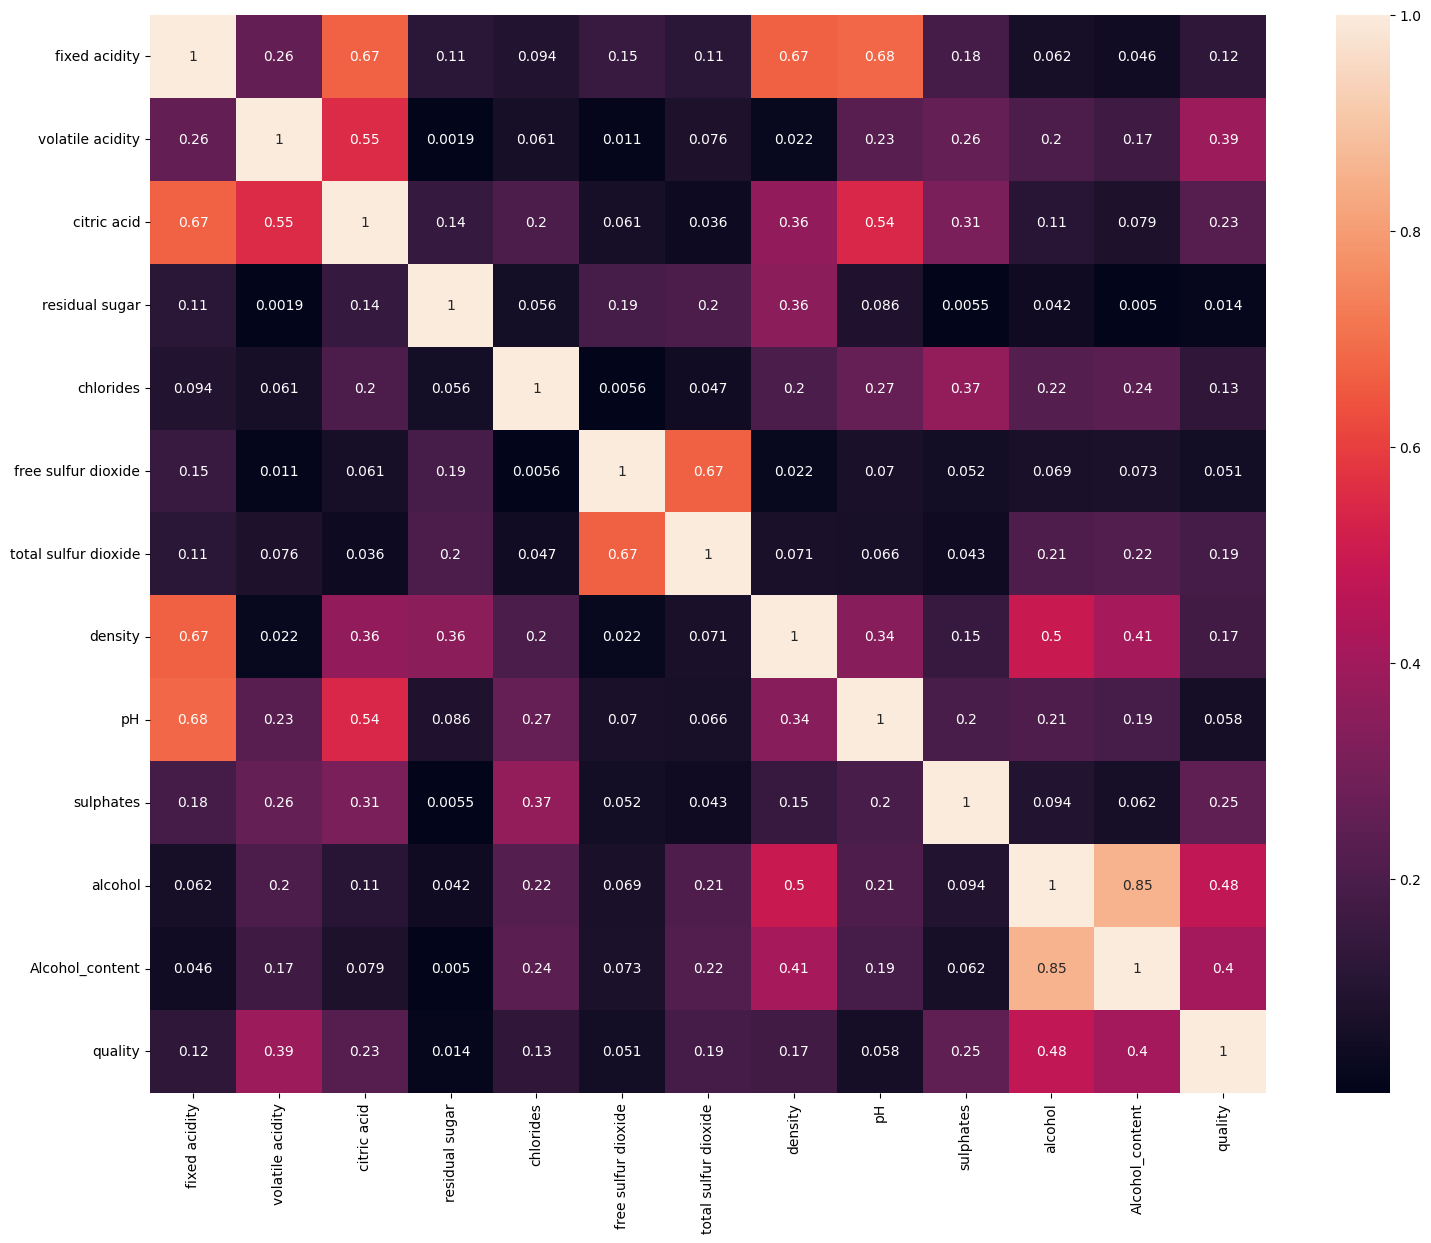

In [13]:
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

Seems like alcohol_content and alcohol are correlated as per above heat map. But we need proof.

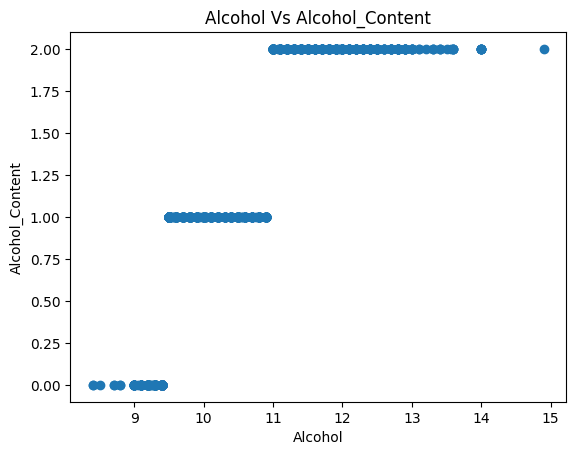

In [17]:
plt.scatter(data.alcohol,data.Alcohol_content)
plt.xlabel('Alcohol')
plt.ylabel('Alcohol_Content')
plt.title('Alcohol Vs Alcohol_Content')
plt.show()

We see clear trend . As and when alcohol level increases its content also increasing . so we can delete one of them.

# Train Test Split

Suppose, Client say that i have only this much of data (this much means 1,2 million) whatever i have i giving to you . so whatever you are going to build a model you have to do by taking this much of a data whatever i am giving to you . i dont have anything extra . basically he will give everything to you . so i need to bulid a model so in ordered to build a model what we did in earlier example we build a model linear regression then we have evaluated .(Use Some metric to check how good is the model) remember that we trained our model then we check how good is our model/model confidence . So i have to basically build my model train in a given dataset and also i need to test it . because i can not just build model and give it to client (He laughs at you ) He ask to you did you tested it, its working fine , How its the performance , What is the accuracy of the model , what is the confidence of the model what is 
 . He will start asking all those question . How are we going to get that. How are we going to evaluate model accuracy , How are we going to test...

Example 2- Suppse You are Enginnering student and you study daily . so whole year you study. Then college wants to test you . How our professor is goinig to test you . by giving some question then he will able to tell you how good you are . Then you show your performance in the terms of percentage of marks . for that they will conduct a test. they need a question and question is came form with in a syllabus.

Your whole syllabus is you dataset in that you are going to get trained you learn all the answer from the syllabus . then you get trained

Professor are going to test with some Question so we need a training data and test data .

--> Training is for learning Purpose

--> Test is for checking Purpose

For that we need the whole dataset i need to split into train and test that is basically train test split.

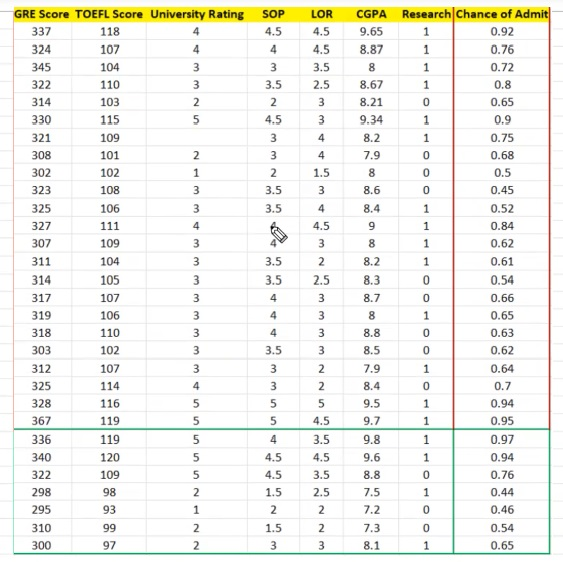

So take your academic example :- So when i am training you in your college in that time we are give question and we will also give answer so you are going to get trained . That all you learn I am going to give question as well as answer and i am teaching you .

But when i am testing you i will give only question , I dont give you answer . i will hide the answer.

I will give you question for model testing or prediction it will going to predict label.

In [18]:
# Let's prepare the data for modeling by removing the 'Alcohol_content' feature from the predictors and setting 'quality' as the target variable.
x = data.drop(columns=['Alcohol_content', 'quality'])
y = data.quality


In [19]:
#Lets split the data into a train test spli
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

Here we are not going to use Standard Scaler because decision tree will take care of that you dont need to standadize the data in the decision tree.

In [ ]:
#Write function and call as many times to check accuaracy_score of different models

In [20]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Test Score======================")
        print("Accuracy Score===>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report==>",classification_report(y_test,pred))


In [21]:
#Intiate DecisionTressClassifier with new parameter and train

cnn=DecisionTreeClassifier()

In [23]:
#Traib the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier()

fit() -When we use fit. The fit() is started finding the relationship between features and labels. it will start learning ,How is Variance. and Trying to find pattern, model is learning, and learn as much as possible.

In [24]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   100.0
=================Test Score======================
Accuracy Score===>   59.25
Classification Report==>               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        11
           5       0.68      0.73      0.70       166
           6       0.60      0.54      0.57       160
           7       0.48      0.53      0.50        57
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.29      0.30      0.30       400
weighted avg       0.59      0.59      0.59       400



Q- In general which model pretend to overfit.


Ans- Decision Tree . Because this is rule based algorithm . every is going to divided so possibilty is there overrfit problem.



Q - You say decision tree is a good model, one of the best model so where is the use of that.


Ans- So, we will apply some techniques to overcome this but that will take some time . they will take some cost . without hyperparameter tuning it will pretend to overfitting.


"Now we did not tune any parameter and we got 100%"

# How we Calculate Criterian
## Start with Gini Index

#### Formula 
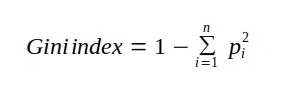


##### P= Probablity Outcome
### See the dataset

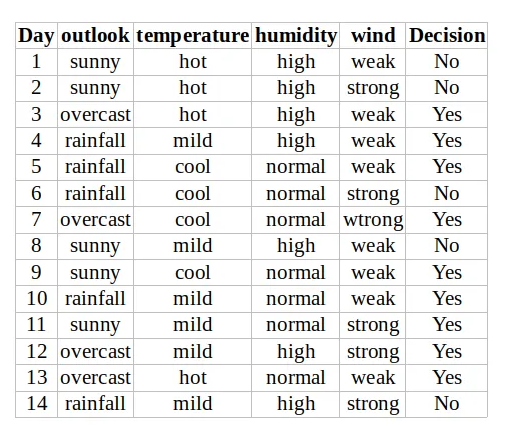


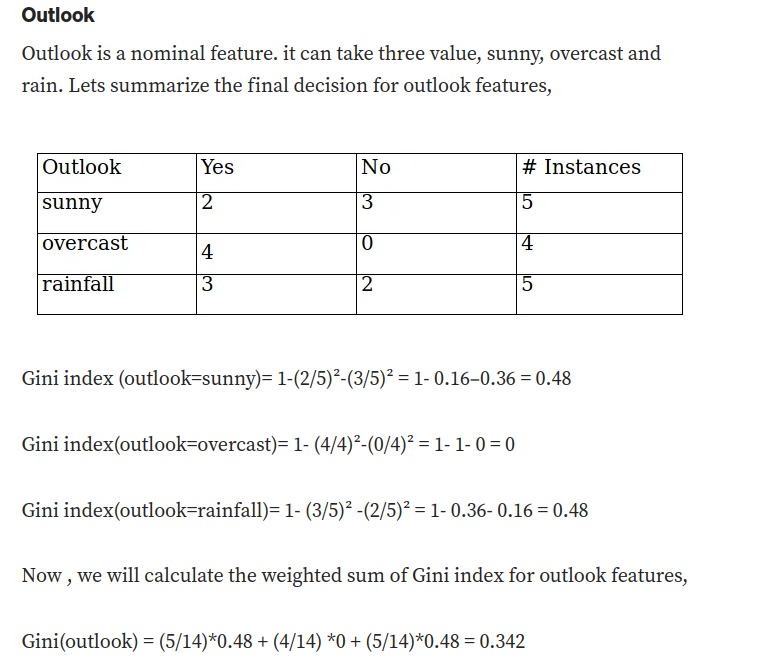

**Gini Index** lies between [0-1]



A Gini index is a measure of statistical dispersion that represents the inequality of a distribution. It ranges from 0 to 1, where 0 represents perfect equality, and 1 represents perfect inequality.

In [ ]:
import numpy as np
sunny=1-np.square(2/5)-np.square(3/5)
sunny

### How can we calculate Entropy
Entropy is always between 0 and 1, but it can be greater than 1 depending on the number of classes in the dataset. Entropy is lower when it is easier to draw a valuable conclusion from a piece of information.


#### See dataset
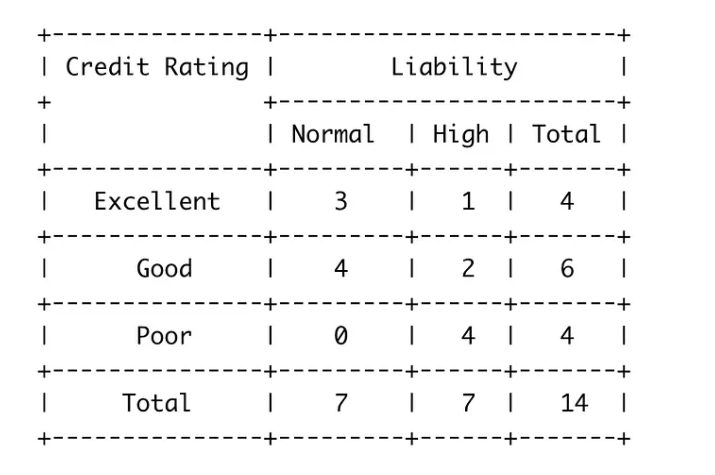


#### About the Dataset
This dataset can be used to understand the relationship between credit rating and liability. For example, the data suggests that companies with a poor credit rating are more likely to have high liability.


#### Formula
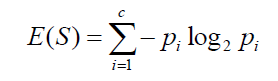


### Lets Start Finding the Entropy using above image dataset

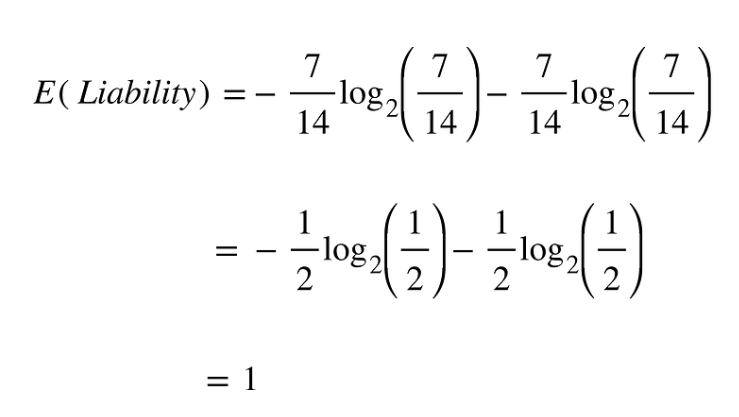

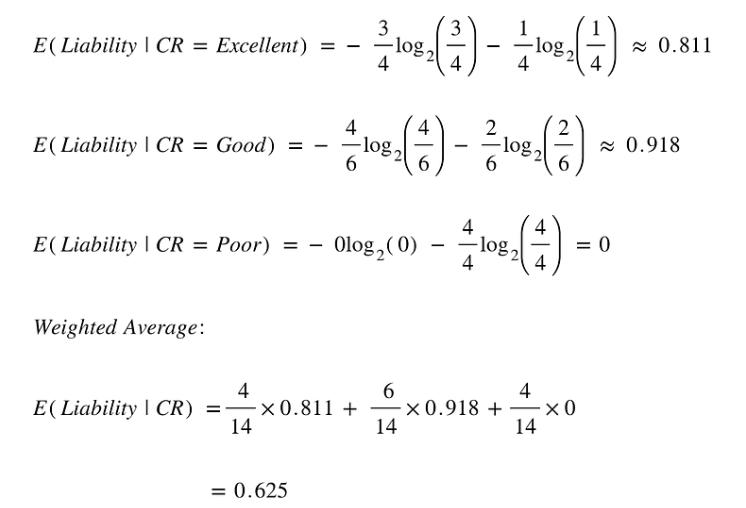
     
     - First we need to calculate a Entropy for Target Column(Liability)
     - We then need to calculate the entropy for each category within a feature.
     - Then we will Calculate the information gain.

#### Information gain formula
#### Information gain lies between [0-1]
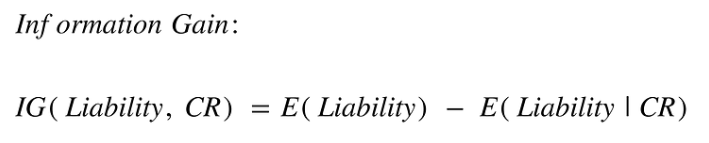


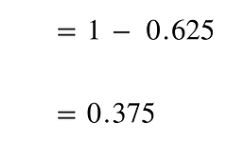

In [ ]:
#Like this we can calculate
import math
Excellent=-3/4 * math.log2(3/4)-1/4*math.log2(1/4)

Information gain is a number between 0 and 1. If it's close to 1, it means the thing we're looking at gives us a lot of helpful information for sorting things out. If it's closer to 0, it doesn't give us much useful info for sorting things.

# Lets Understand the above tree:

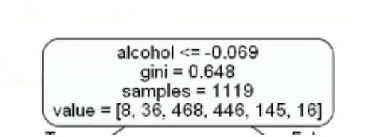

- The first value indicates the column and the condition on which the root rode was selected and further will be splitted.


- The second value gives the ginni impurity of the selected node


- Samples gives the numbers of observation at that point present in the node.



- Value with the square brackets represent number of observation present in each class (output) i.e in the above give figure,8 observation are in class 1-38 , in class2-468 snd so on.



- Then the split was made on the basis of given condtion

Root Node -  Alcohol feature is the top feature that contributes more to the label and we have seen this in heat map..



Q- What basis we decided alcohol is best feature .

Ans - Gini Indexing



Q- What is sample ?

Ans - Samples is when it is dividing yes or No based on some condition . so that time we have 1119  Samples.

Sample is nothing but number of rows , number of observation all are same here . we called samples.



Q- What are Values ?

Ans- Out of these sample 1119, so  8 sample are classified as quality number 3.

Values - 8,36,468,446,145,16


Quality - 3,4,5,6,7,8

Q - How it is dividing 


Ans- what is does alcohol take some numbers. and let say average .it has to divide this into True and False so it. will pick this number <=-0.069. so this will picked based on ginni.

if alcohol level <=10.25 go  True side if this condition is False go False side. is this how journey will start.



So out of this 1119 samples of the True and Some will False.



Then the next feature or second highest feature is sulfur dioxide <=98.5. what wa the ginni indexing number -0.511 it will give all this information and samples =641


Values - 5,23,408,183,20,2
Quality - 3,4,5,6,7,8




So it will keep on dividing unit last leaf node. leaf node is anywhere it does not need all the way down only.





Q - Lets Understand leaf node ?

Ans - Same thing it will keep dividing so here you can see sample 4.

Only one sample belongs to quality

 Values = [0,0,1,3,0,0]
 
 Quality = [0,0,5,6,0,0]  it will go until that point so these are all leaf.
 
 
 
 Q - Why we are calling leaf node - > Where Decision are being made,

# Model Confidence / Accuracy


Lets now try to tune some parameters using the GridSearchCV algorithm.


GridSearchCV is a method used to tune our hyperparameter we can pass different values  of hyperparameter as parameter for grid search it does a exhaustive generation of combination of different  parameters  passed . using cross validation score , GridSearch returms the combination of hyperparameter for which the model is perfprminng the best.

Q- What are hyper paramters ?


DecisionTreeClassifier(class_weight=None,
                      
                      
                      
                      Criterion='gini,
                       max_depth=None,
                       Max_feature=None,Max_leaf_nodes=None,
                       min_impurity_decreases=0.0, presort=False,
                       random_state=None,splitter='best)
                       
                       

We can see above the decision tree classifier algorithms takes all those parameters which are also know as hyperparameter.


Let see the most importance ones of the parameter (as per sklearn documentation)

In [ ]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.


grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian

In [ ]:
grid_search=GridSearchCV(estimator=cnn,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .


In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
best_parameter=grid_search.best_params_
print(best_parameter)

In [ ]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=9,min_samples_split= 3)

In [ ]:
#Train the model
cnn.fit(x_train,y_train)

In [ ]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

#### Why we dont need Scaling in Decision Tree

Splitting criterion: Decision trees make decisions based on the values of individual features independently, not considering the scale or distribution of other features. When deciding how to split the data at each node, decision trees only compare feature values against a threshold. The scale of the features doesn't affect this comparison, only their relative ordering matters.

Invariant to monotonic transformations: Decision trees are invariant to monotonic transformations of features. This means that scaling or shifting the values of a feature won't affect the structure or the decisions made by the tree. So, whether a feature has a mean of 0 and a standard deviation of 1 (after standard scaling) or has its original values, the resulting tree structure will be the same.


No distance-based calculations: Unlike algorithms such as k-nearest neighbors or support vector machines, decision trees don't rely on distance-based calculations. In these algorithms, scaling can be crucial because it ensures that all features contribute equally to the distance metric. However, decision trees use rule-based splits rather than distances, making scaling unnecessary.



# WHy decision tree tend to overfit

    - High Variance: Decision trees sometimes pay too much attention to tiny details in their training data, even the irrelevant ones. This can make them overly complicated and not very good at dealing with new, unseen data.
    
    - Lack of Regularization: Decision trees can become like students who memorize the textbook instead of understanding the material. Without rules to keep them in check, they might just cram all the training data into their branches without really learning anything useful.
    
    - Greedy Nature: Decision trees make quick decisions without really thinking about the big picture. They just grab whatever seems best at the moment, which can sometimes lead to messy, not-so-great trees, especially with complicated data.

In [ ]:
#AI Engineer - Saurav
#Date -16 April 2024 
#Time- 14:32